In [1]:
!pip install scikit-learn==1.4.1.post1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install kaggle

In [5]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
!mkdir ~/.kaggle

In [7]:
!mv kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets list

ref                                                 title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                  Vehicle Sales Data                       19MB  2024-02-21 20:16:17           9858        177  1.0              
arnavvvvv/spotify-music                             Top Spotify Songs                        47KB  2024-03-06 05:20:29           1671         37  1.0              
tarunrm09/climate-change-indicators                 Climate change Indicators                34KB  2024-02-22 08:53:54           5131        114  1.0              
arnavvvvv/netflix-movies-and-tv-shows               Netflix Movies and TV Shows               1MB  2024-03-04 15:49:29           1914         46  1.0              
zain280/data-sci

In [10]:
!kaggle datasets download -d yashdharme36/airfare-ml-predicting-flight-fares

 45% 3.00M/6.66M [00:00<00:00, 5.66MB/s]
100% 6.66M/6.66M [00:00<00:00, 9.27MB/s]


In [11]:
!unzip airfare-ml-predicting-flight-fares.zip

Archive:  airfare-ml-predicting-flight-fares.zip
  inflating: Cleaned_dataset.csv     
  inflating: Scraped_dataset.csv     


In [60]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [14]:
df = pd.read_csv('Cleaned_dataset.csv')
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [16]:
df.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

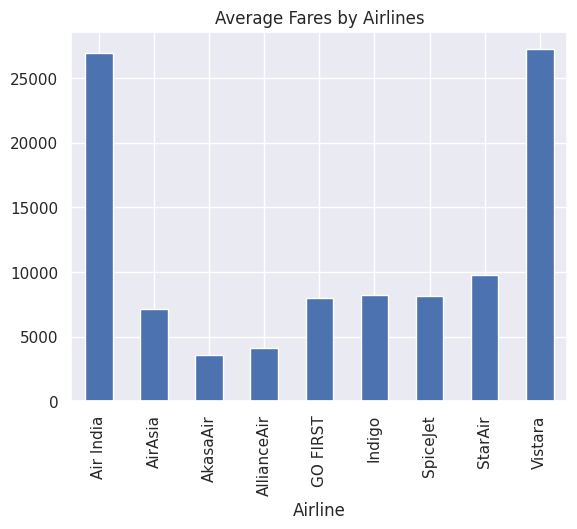

In [18]:
sns.set(style='darkgrid')
df.groupby('Airline')['Fare'].mean().plot(kind='bar')
plt.title('Average Fares by Airlines')
plt.show()

In [19]:
data = df.groupby(['Airline', 'Class'])['Fare'].mean().reset_index()
data

,Airline,Class,Fare
0,Air India,Business,46961.687859
1,Air India,Economy,11302.748743
2,Air India,First,60731.062500
3,AirAsia,Economy,7092.265922
4,AkasaAir,Economy,3570.034529
5,AllianceAir,Economy,4077.501272
6,GO FIRST,Economy,8015.075005
7,Indigo,Economy,8198.754809
8,SpiceJet,Economy,8109.773154
9,StarAir,Economy,9792.774194


<Axes: xlabel='Airline', ylabel='Fare'>

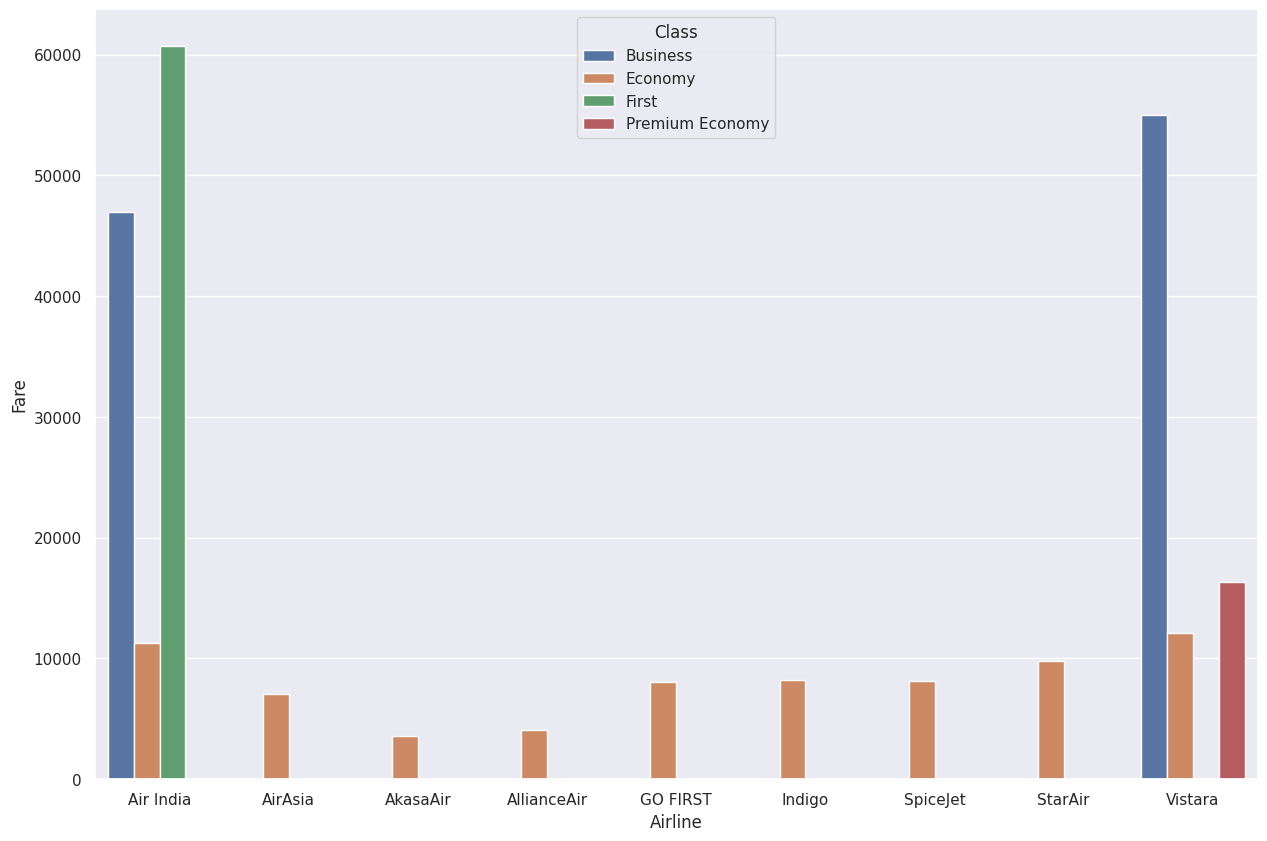

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x='Airline', y='Fare', hue='Class')

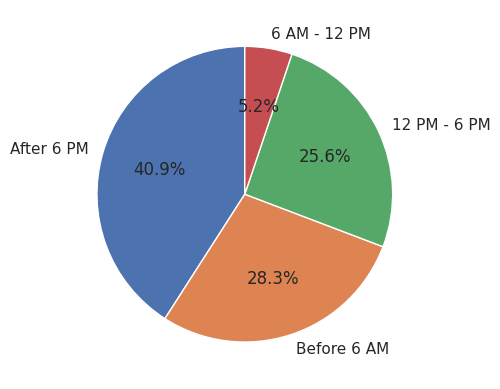

In [24]:
plt.pie(df['Departure'].value_counts(), autopct='%1.1f%%', startangle=90, labels=list(df['Departure'].unique()))
plt.show()

In [25]:
data = df.groupby(['Airline', 'Departure'])['Fare'].mean().reset_index()
data

,Airline,Departure,Fare
0,Air India,12 PM - 6 PM,27658.388929
1,Air India,6 AM - 12 PM,26116.462990
2,Air India,After 6 PM,27358.674830
3,Air India,Before 6 AM,27125.234153
4,AirAsia,12 PM - 6 PM,7748.973578
5,AirAsia,6 AM - 12 PM,7066.785965
6,AirAsia,After 6 PM,6138.696805
7,AirAsia,Before 6 AM,7426.962286
8,AkasaAir,12 PM - 6 PM,4162.119565
9,AkasaAir,6 AM - 12 PM,3371.058741


<Axes: xlabel='Airline', ylabel='Fare'>

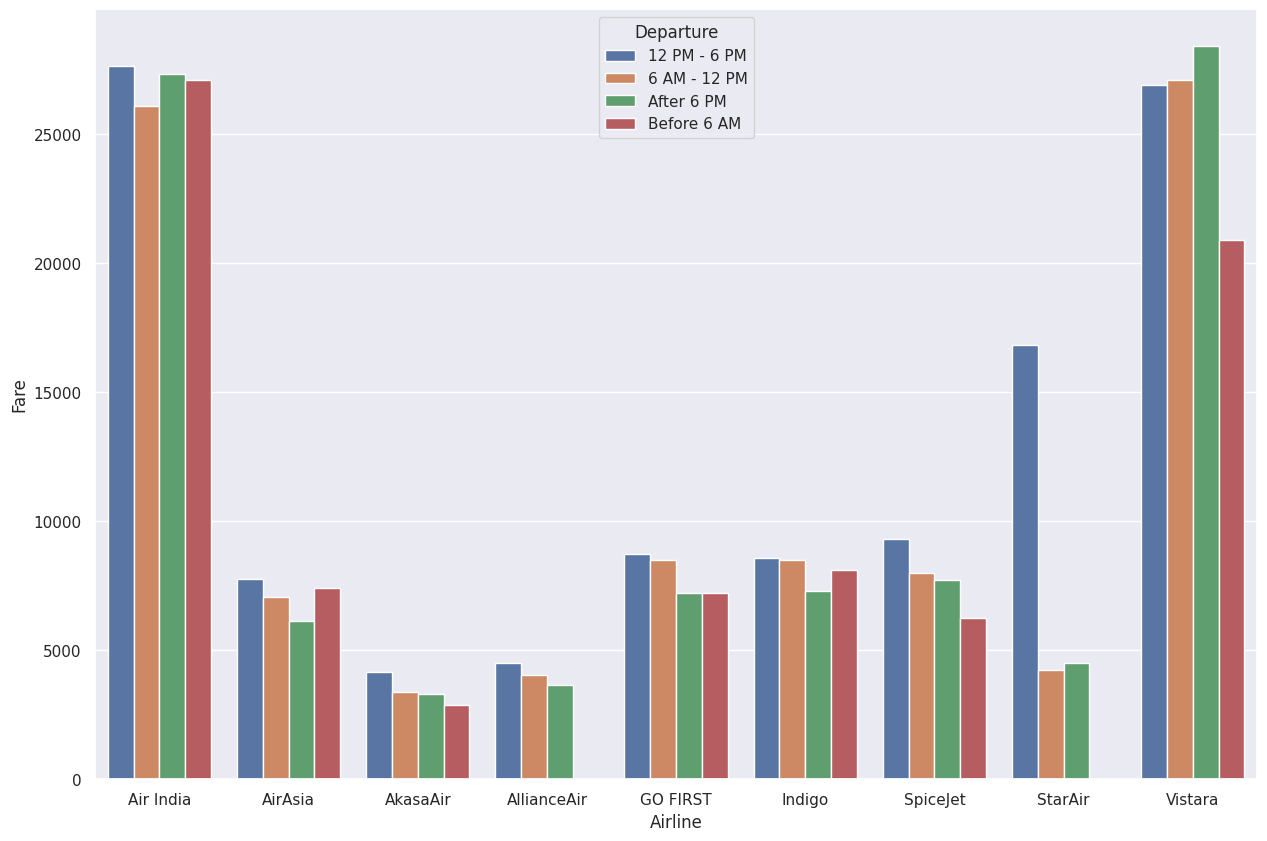

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x='Airline', y='Fare', hue='Departure')

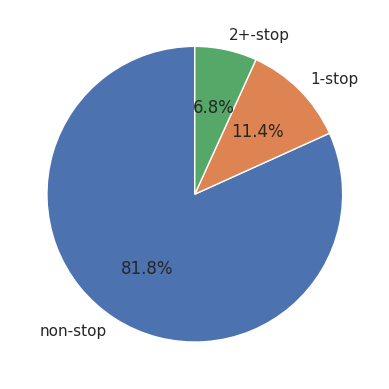

In [28]:
plt.pie(df['Total_stops'].value_counts(), autopct='%1.1f%%', startangle=90, labels=list(df['Total_stops'].unique()))
plt.show()

In [29]:
data = df.groupby(['Airline', 'Total_stops'])['Fare'].mean().reset_index()
data

,Airline,Total_stops,Fare
0,Air India,1-stop,28949.537043
1,Air India,2+-stop,15298.385404
2,Air India,non-stop,15661.791265
3,AirAsia,1-stop,7032.125735
4,AirAsia,2+-stop,9601.759278
5,AirAsia,non-stop,4927.308655
6,AkasaAir,non-stop,3570.034529
7,AllianceAir,1-stop,4734.928571
8,AllianceAir,non-stop,3859.101695
9,GO FIRST,1-stop,8835.551694


<Axes: xlabel='Airline', ylabel='Fare'>

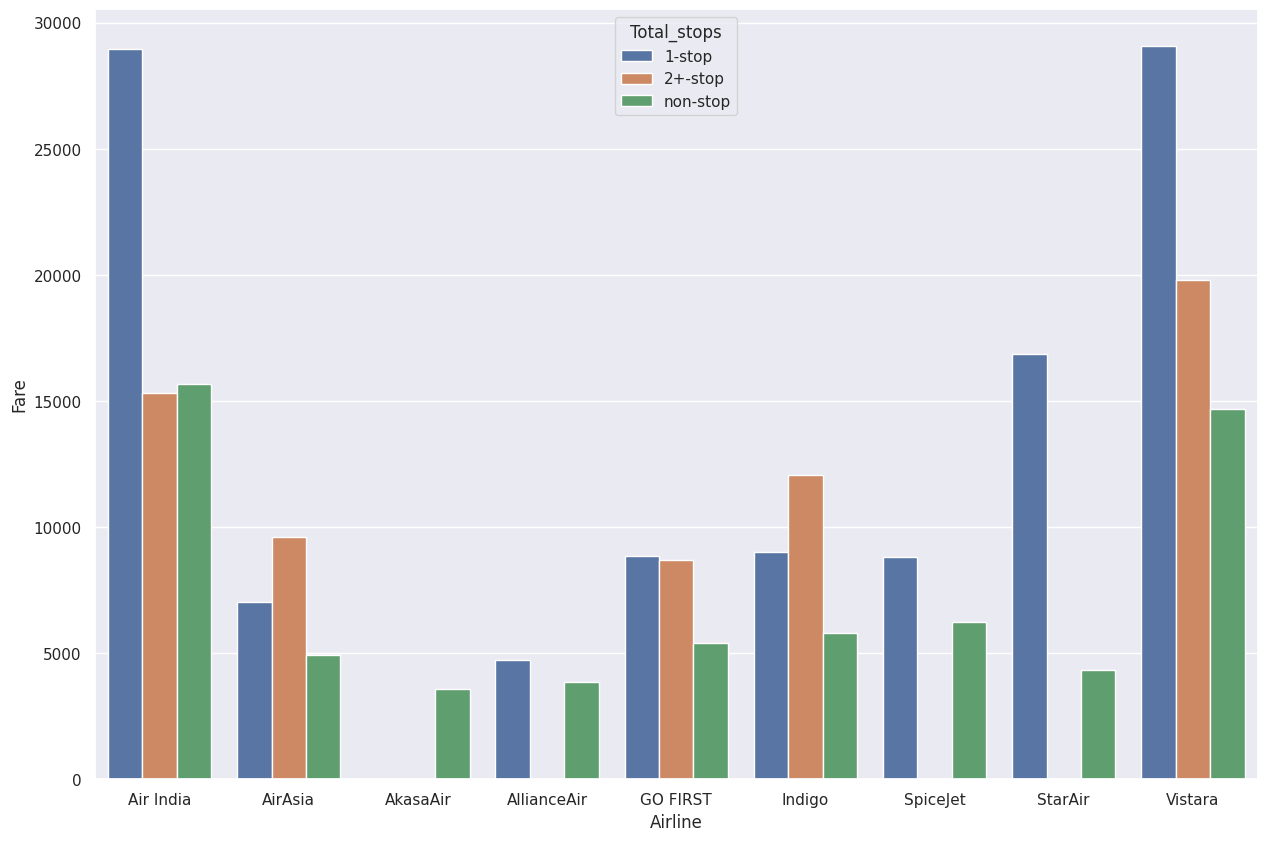

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x='Airline', y='Fare', hue='Total_stops')

<Axes: xlabel='Airline', ylabel='Fare'>

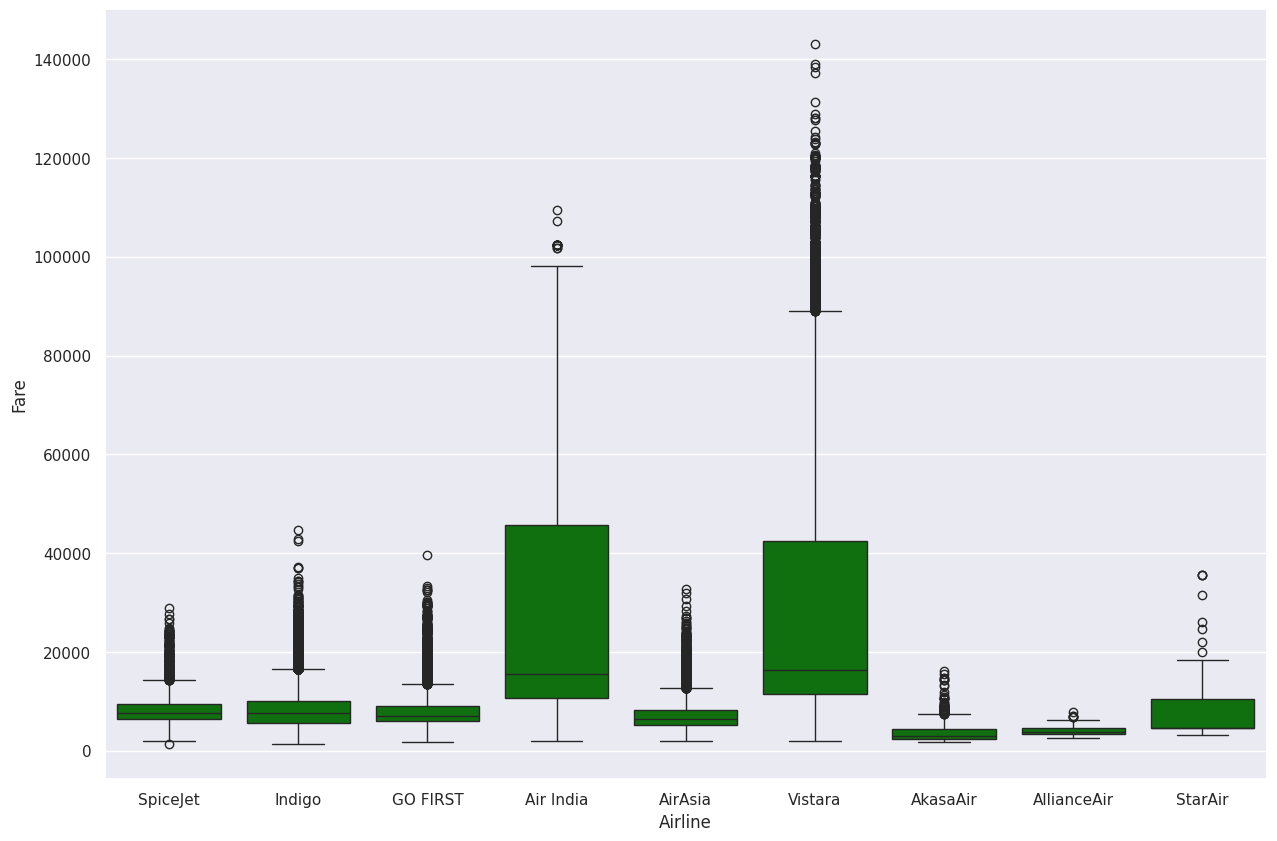

In [32]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Airline', y='Fare', data=df, color='green')

<Axes: xlabel='Airline', ylabel='Fare'>

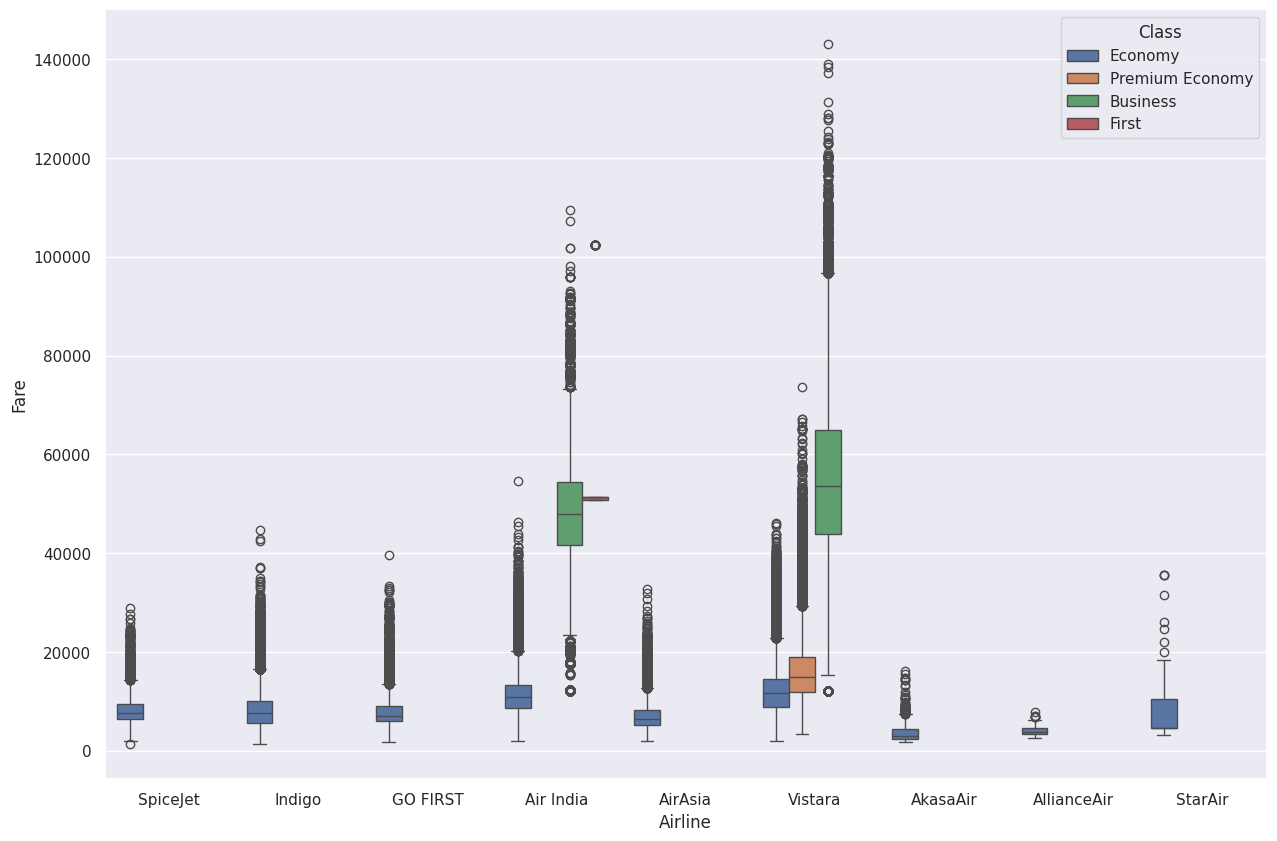

In [34]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Airline', y='Fare', data=df, hue='Class')

<Axes: xlabel='Airline', ylabel='Fare'>

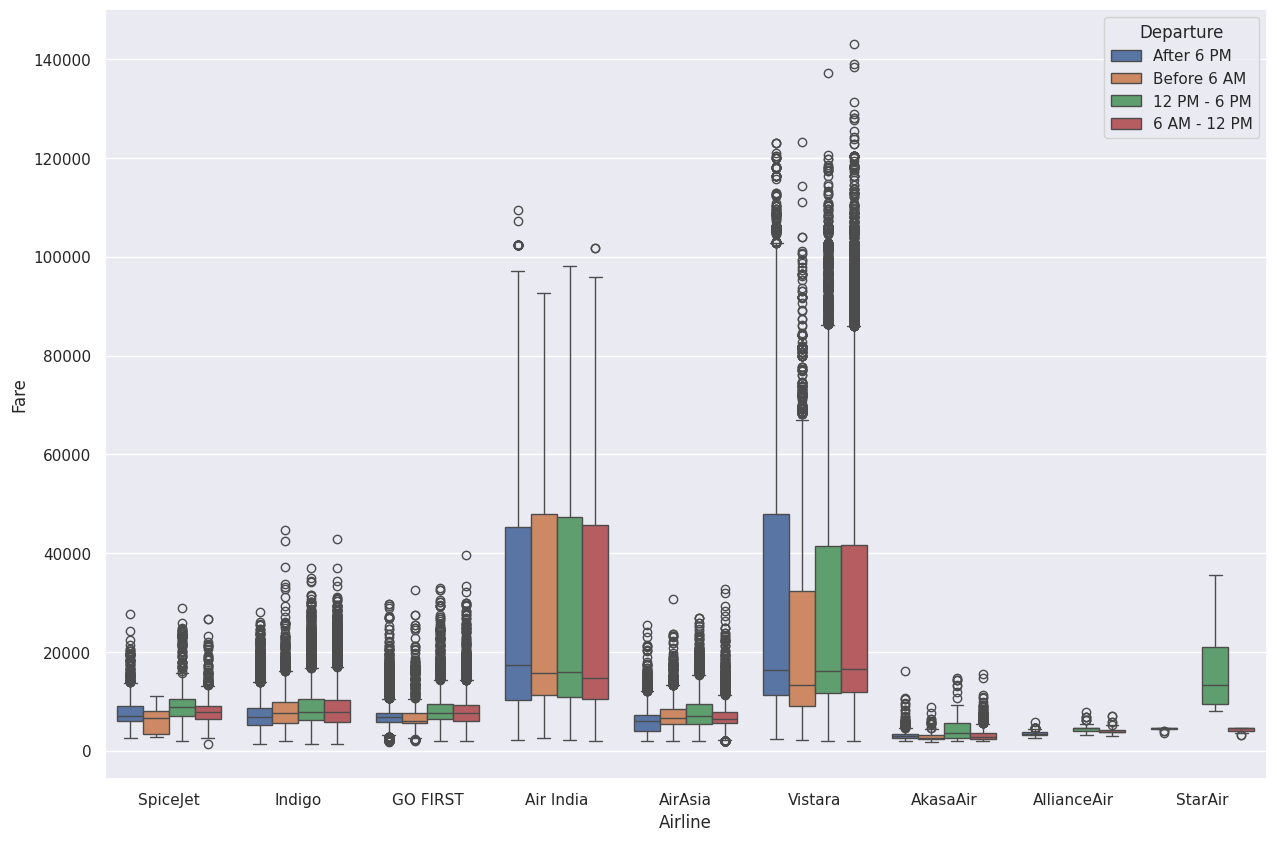

In [35]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Airline', y='Fare', data=df, hue='Departure')

<Axes: xlabel='Airline', ylabel='Fare'>

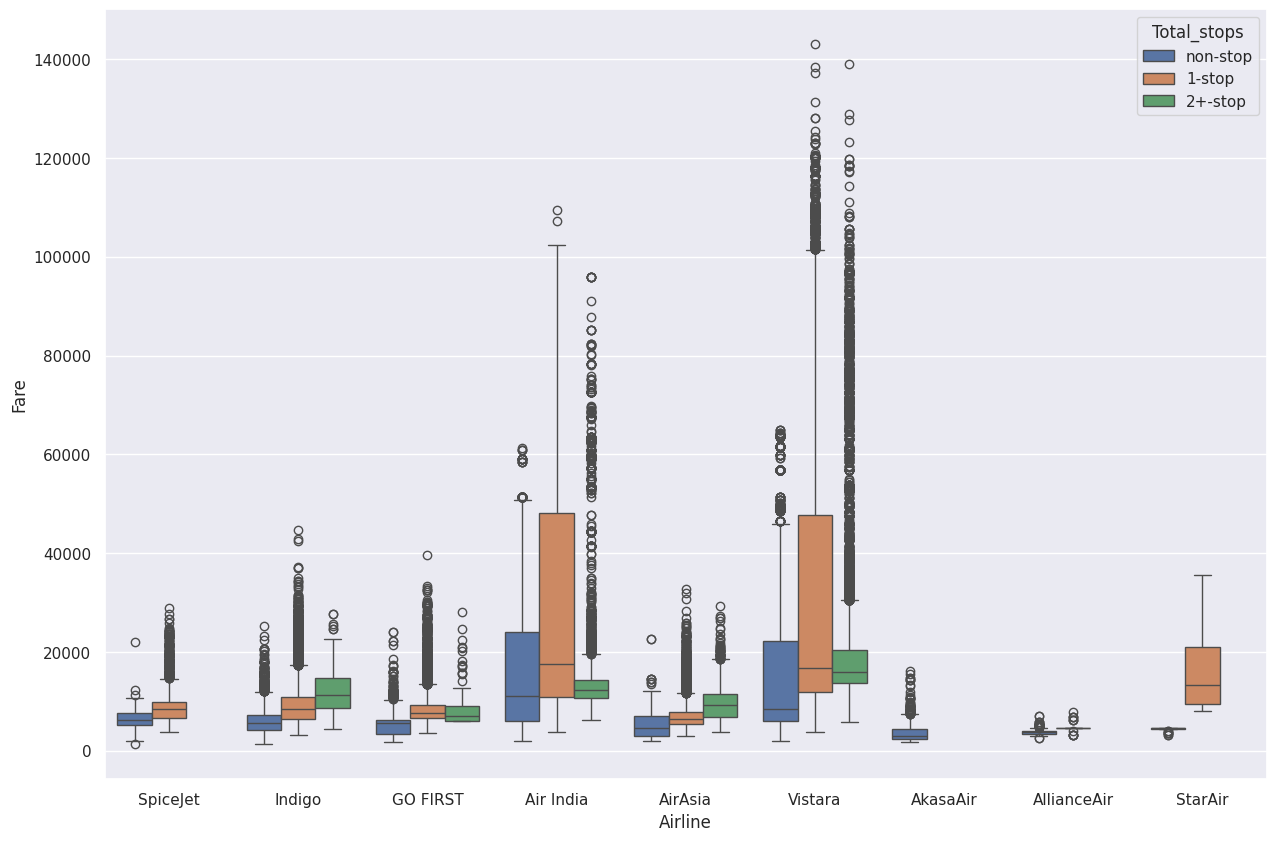

In [36]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Airline', y='Fare', data=df, hue='Total_stops')

<Axes: xlabel='Days_left', ylabel='Fare'>

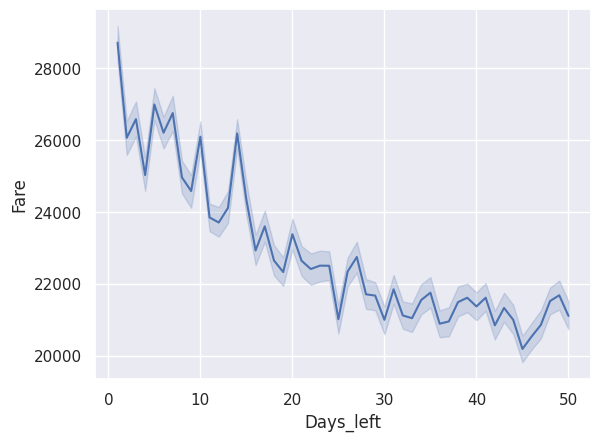

In [37]:
sns.lineplot(data=df, x='Days_left', y='Fare')

<ipython-input-39-d2fc5c210a0d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


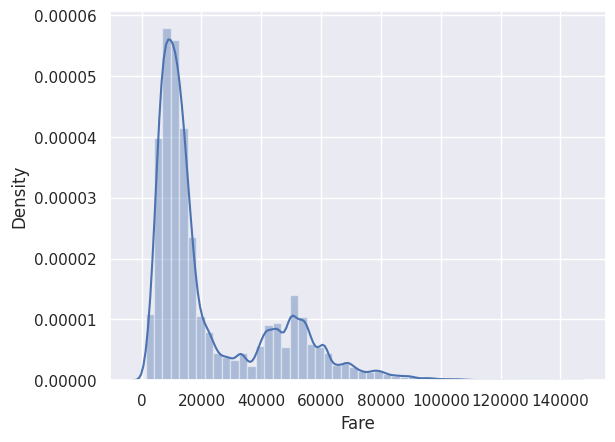

In [39]:
sns.distplot(df['Fare'])
plt.ticklabel_format(style='plain', axis='y')

In [45]:
encoder = LabelEncoder()

In [46]:
df['Journey_day'] = encoder.fit_transform(df['Journey_day'])
encoder.classes_

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [47]:
df['Airline'] = encoder.fit_transform(df['Airline'])
encoder.classes_

array(['Air India', 'AirAsia', 'AkasaAir', 'AllianceAir', 'GO FIRST',
       'Indigo', 'SpiceJet', 'StarAir', 'Vistara'], dtype=object)

In [48]:
df['Class'] = encoder.fit_transform(df['Class'])
encoder.classes_

array(['Business', 'Economy', 'First', 'Premium Economy'], dtype=object)

In [49]:
df['Source'] = encoder.fit_transform(df['Source'])
encoder.classes_

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai'], dtype=object)

In [50]:
df['Departure'] = encoder.fit_transform(df['Departure'])
encoder.classes_

array(['12 PM - 6 PM', '6 AM - 12 PM', 'After 6 PM', 'Before 6 AM'],
      dtype=object)

In [51]:
df['Total_stops'] = encoder.fit_transform(df['Total_stops'])
encoder.classes_

array(['1-stop', '2+-stop', 'non-stop'], dtype=object)

In [52]:
df['Arrival'] = encoder.fit_transform(df['Arrival'])
encoder.classes_

array(['12 PM - 6 PM', '6 AM - 12 PM', 'After 6 PM', 'Before 6 AM'],
      dtype=object)

In [53]:
df['Destination'] = encoder.fit_transform(df['Destination'])
encoder.classes_

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai'], dtype=object)

In [54]:
df.drop(['Date_of_journey', 'Flight_code'], axis=1, inplace=True)

In [55]:
df.head()

,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,1,6,1,3,2,2,2,6,2.0833,1,5335
1,1,5,1,3,2,2,3,6,2.3333,1,5899
2,1,4,1,3,2,2,3,6,2.1667,1,5801
3,1,6,1,3,2,2,2,6,2.0833,1,5794
4,1,0,1,3,2,2,2,6,2.1667,1,5955


<Axes: >

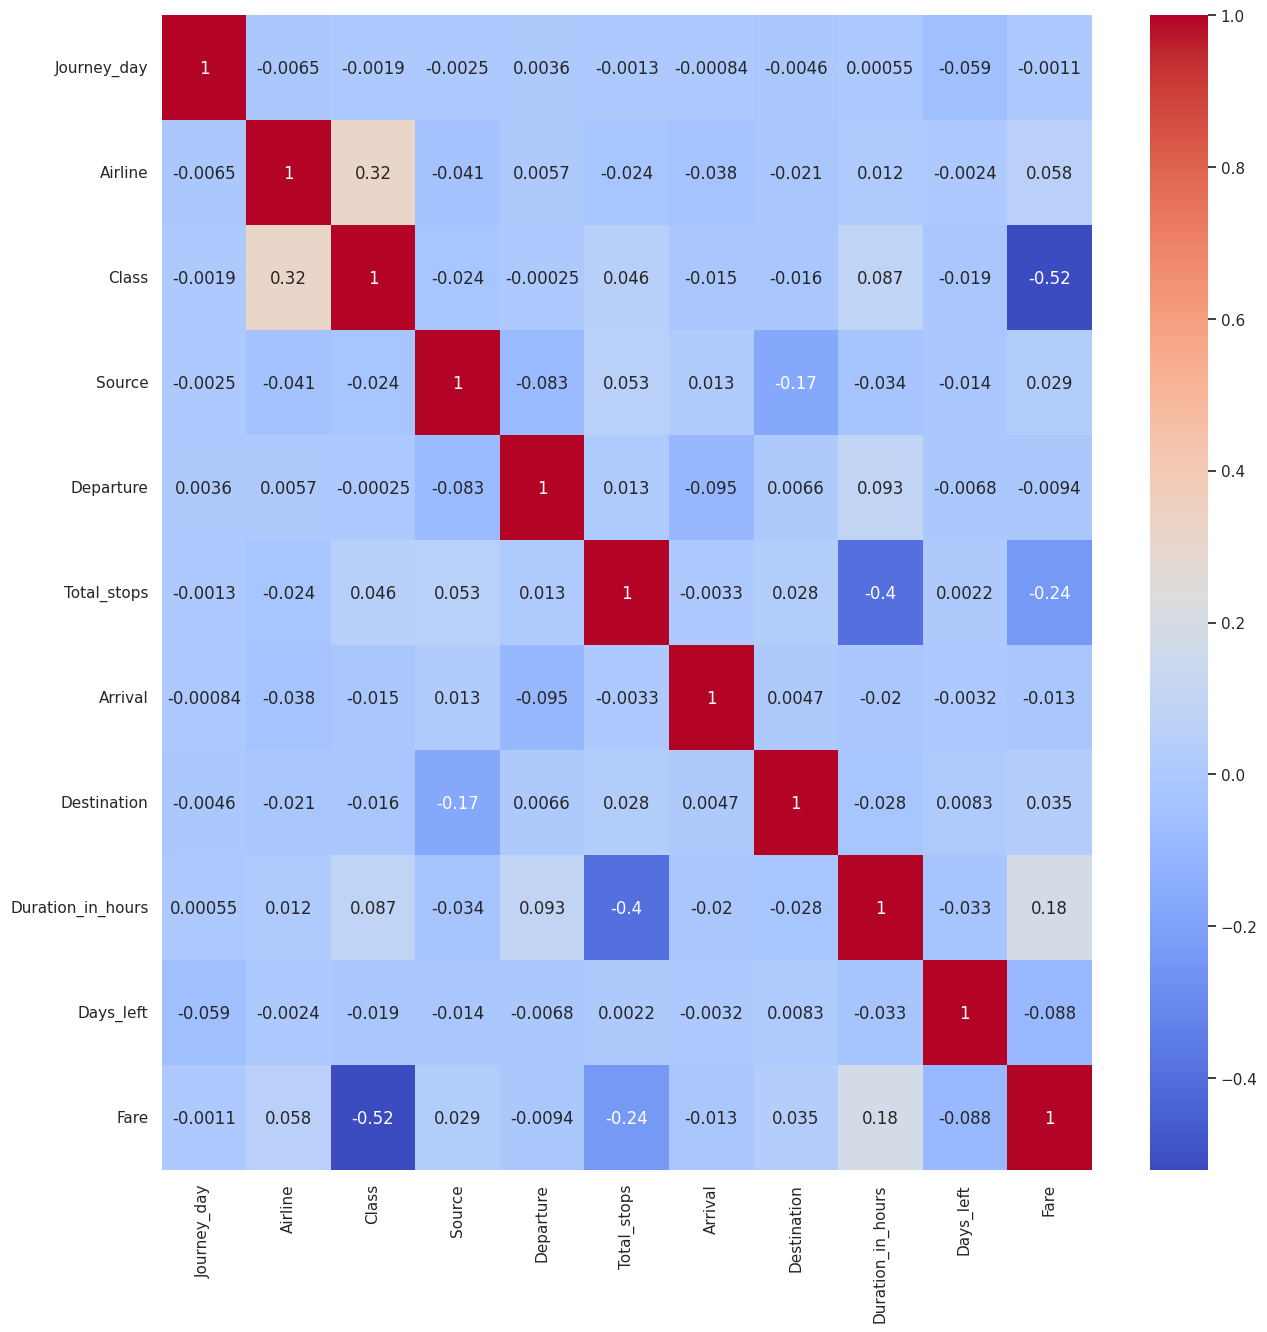

In [56]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [57]:
x = df.drop('Fare', axis=1)
y = df['Fare']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
#model1 - Linear Regression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = model1.predict(x_test)

In [62]:
model1_mae = mean_absolute_error(y_test, y_pred)
model1_mae

13140.232053722553

In [63]:
model1_mse = mean_squared_error(y_test, y_pred)
model1_mse

244048136.36152327

In [64]:
model1_r2 = r2_score(y_test, y_pred)
model1_r2

0.40860762559688646

In [65]:
#model2 - SGDRegression
model2 = SGDRegressor()
model2.fit(x_train, y_train)

SGDRegressor()

In [66]:
y_pred = model2.predict(x_test)

In [67]:
model2_mae = mean_absolute_error(y_test, y_pred)
model2_mae

13167.5106884755

In [68]:
model2_mse = mean_squared_error(y_test, y_pred)
model2_mse

283554232.15983516

In [69]:
model2_r2 = r2_score(y_test, y_pred)
model2_r2

0.3128740373553003

In [71]:
#model1 -  MLPRegressor
model3 = MLPRegressor()
model3.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [72]:
y_pred = model3.predict(x_test)

In [73]:
model3_mae = mean_absolute_error(y_test, y_pred)
model3_mae

4442.308085538304

In [74]:
model3_mse = mean_squared_error(y_test, y_pred)
model3_mse

50090759.126103275

In [75]:
model3_r2 = r2_score(y_test, y_pred)
model3_r2

0.8786170080341943

In [76]:
results = pd.DataFrame(
    {
        'LinearRegression': [model1_mae, model1_mse, model1_r2],
        'SGDRegressor': [model2_mae, model2_mse, model2_r2],
        'MLPRegression': [model3_mae, model3_mse, model3_r2],
    },
    index=['Mean Absolute Error', 'Mean Squared Error', 'R2 Score']
    )

<Axes: >

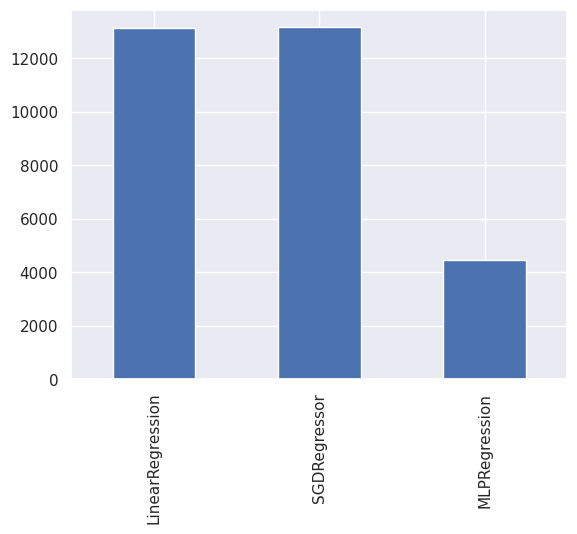

In [77]:
results.iloc[0].plot(kind='bar')

<Axes: >

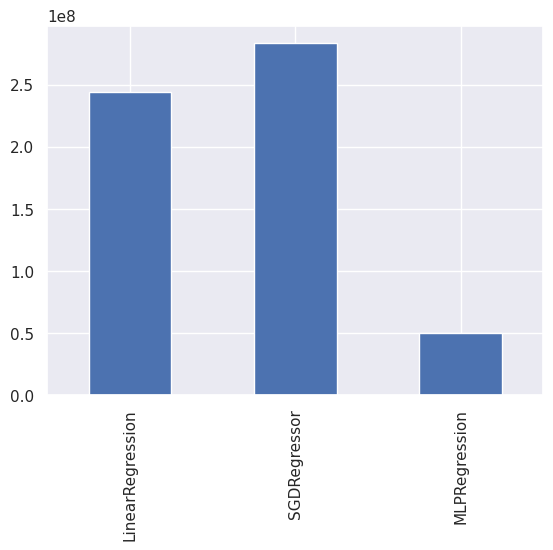

In [78]:
results.iloc[1].plot(kind='bar')

<Axes: >

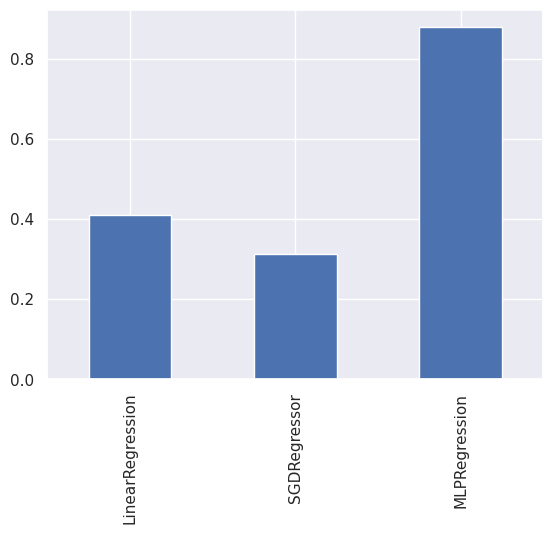

In [79]:
results.iloc[2].plot(kind='bar')

In [80]:
import joblib
joblib.dump(model3, 'flight_fare_predictor.joblib')

['flight_fare_predictor.joblib']